In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [80]:
img1 = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

#for x in img:
#    print(x)
#print()

def mark(img):
    cur = 2
    dirs = [(0, -1), (-1, -1), (-1, 0), (-1, 1)]
    graph = dict()
    for i in range(len(img)):
        for j in range(len(img[0])):
            px = img[i][j]
            if px == 1:
                nachbarn = set()
                nachbarn_l = []
                for d in dirs:
                    ni = i + d[0]
                    nj = j + d[1]
                    if 0 <= ni < len(img) and 0 <= nj < len(img[0]):
                        if img[ni][nj] > 1:
                            nachbarn.add(img[ni][nj])
                            nachbarn_l.append(img[ni][nj])
                if len(nachbarn) == 0:
                    graph[cur] = set()
                    img[i][j] = cur
                    cur += 1
                elif len(nachbarn) == 1:
                    img[i][j] = nachbarn_l[0]
                else:
                    img[i][j] = nachbarn_l[0]
                    for x in nachbarn:
                        graph[x].update(y for y in nachbarn if y != x)

    #for x in img:
    #    print(x)
    #print()
    #print(graph)
    #print()
    return build_sets(graph)

def build_sets(graph):
    res = []
    visited = set()
    for k in graph:
        if k in visited:
            continue
        cur = set()
        dfs(cur, graph, k, visited)
        res.append(cur)
    return res

def dfs(acc, graph, node, visited):
    if node in visited:
        return
    acc.add(node)
    visited.add(node)
    for x in graph[node]:
        dfs(acc, graph, x, visited)



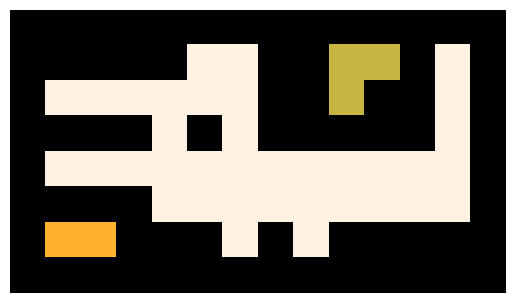

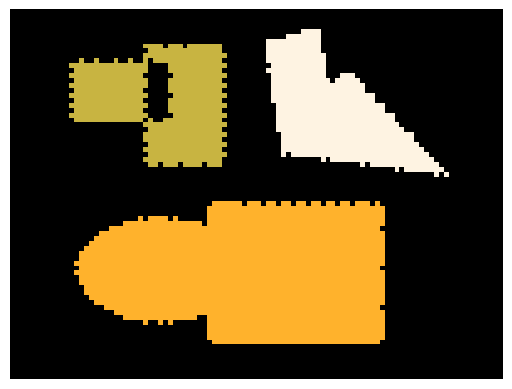

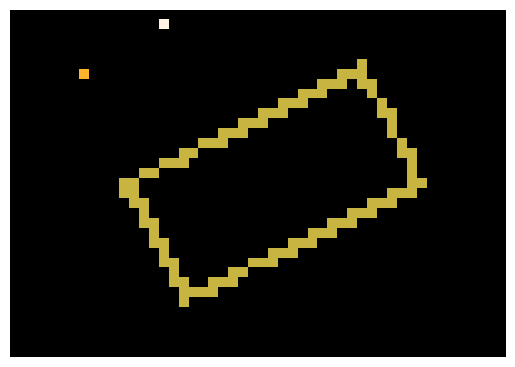

In [81]:
regionen1 = cv2.imread("regionen1.png", cv2.IMREAD_GRAYSCALE)
regionen1_formatiert = np.array([[0 if x == 255 else 1 for x in row] for row in regionen1])
regionen2 = cv2.imread("regionen2.png", cv2.IMREAD_GRAYSCALE)
regionen2_formatiert = np.array([[1 if x == 255 else 0 for x in row] for row in regionen2]) #Achtung Unterschied wegen Vorder-/Hintergrund

regionen1_sets = mark(regionen1_formatiert)
regionen2_sets = mark(regionen2_formatiert)

colors = [[254, 243, 226], [200, 180, 65], [255, 178, 44], [250, 129, 47],
          [0, 243, 226], [0, 198, 35], [0, 178, 44], [0, 129, 47],
          [254, 0, 226], [243, 0, 35], [255, 0, 44], [250, 0, 47],
          [254, 243, 0], [243, 255, 0], [255, 178, 0], [250, 150, 0]]

def visualize_regions(img, region_sets, colors):
    colored_result = np.zeros((len(img),len(img[0]), 3), dtype=np.uint8)
    for i in range(len(img)):
        for j in range(len(img[0])):
            px = img[i][j]
            if px != 0:
                for k,s in enumerate(region_sets):
                    if px in s:
                        colored_result[i][j] = colors[k]

    plt.imshow(colored_result)
    plt.axis("off")
    plt.show()

visualize_regions(img1, mark(img1), colors)
visualize_regions(regionen1_formatiert, regionen1_sets, colors)
visualize_regions(regionen2_formatiert, regionen2_sets, colors)




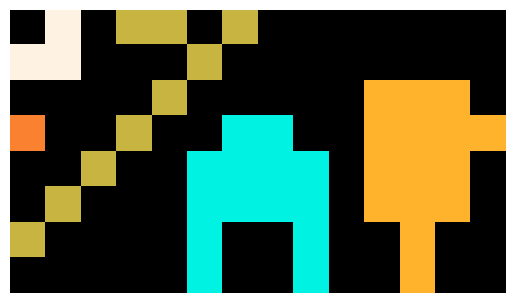

In [82]:
my_craft = [
    [0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
]

visualize_regions(my_craft, mark(my_craft), colors)